In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/Users/omsapkar/Downloads/Updated_NIFTY_50_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Lag_Close,SMA_20,RSI,Price_Trend,SMA_50
0,2024-02-12,21800.80,21831.70,21574.75,21616.05,287436165.0,23921.14,21782.50,21684.4125,50.952576,0,NaN
1,2024-02-13,21664.30,21766.80,21543.35,21743.25,365785766.0,29896.62,21616.05,21666.7025,61.915110,1,NaN
2,2024-02-14,21578.15,21870.85,21530.20,21840.05,359120861.0,32535.00,21743.25,21657.0900,59.659745,1,NaN
3,2024-02-15,21906.55,21953.85,21794.80,21910.75,345394395.0,29559.69,21840.05,21674.0300,64.181721,1,NaN
4,2024-02-16,22020.30,22068.65,21968.95,22040.70,343892935.0,30666.89,21910.75,21702.9525,58.848085,1,NaN


In [13]:
# Check for missing values in the dataset
data.isnull().sum()

Date                0
Open                0
High                0
Low                 0
Close               0
Shares Traded       0
Turnover (₹ Cr)     0
Lag_Close           0
SMA_20              0
RSI                 0
Price_Trend         0
SMA_50             49
dtype: int64

In [14]:
# Simulate sentiment based on price change
data['Sentiment'] = (data['Close'] > data['Lag_Close']).astype(int)

# Display the sentiment column to check results
print(data[['Date', 'Close', 'Lag_Close', 'Sentiment']].head())

         Date     Close  Lag_Close  Sentiment
0  2024-02-12  21616.05   21782.50          0
1  2024-02-13  21743.25   21616.05          1
2  2024-02-14  21840.05   21743.25          1
3  2024-02-15  21910.75   21840.05          1
4  2024-02-16  22040.70   21910.75          1


In [15]:
# Create a 50-day simple moving average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Display the data with the new feature
print(data[['Date', 'Close', 'SMA_50']].head())

         Date     Close  SMA_50
0  2024-02-12  21616.05     NaN
1  2024-02-13  21743.25     NaN
2  2024-02-14  21840.05     NaN
3  2024-02-15  21910.75     NaN
4  2024-02-16  22040.70     NaN


In [16]:
# Prepare features and target variable
data['Price_Trend'] = (data['Close'] > data['Lag_Close']).astype(int)
features = ['Sentiment', 'SMA_50', 'RSI']
target = 'Price_Trend'

X = data[features]
y = data[target]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(183, 3) (46, 3) (183,) (46,)


In [17]:
# Convert 'Date' to datetime format for proper handling
data['Date'] = pd.to_datetime(data['Date'])

# Drop rows with missing values if any
data = data.dropna()

# Display the first few rows to check the preprocessing
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Lag_Close,SMA_20,RSI,Price_Trend,SMA_50,Sentiment
49,2024-04-25,22316.90,22625.95,22305.25,22570.35,475044740.0,53803.80,22402.40,22382.8100,53.989768,1,22219.388,1
50,2024-04-26,22620.40,22620.40,22385.55,22419.95,329887340.0,36984.89,22570.35,22403.5725,47.326369,0,22235.466,0
51,2024-04-29,22475.55,22655.80,22441.90,22643.40,291957361.0,32431.45,22419.95,22429.5600,53.253072,1,22253.469,1
52,2024-04-30,22679.65,22783.35,22568.40,22604.85,361859375.0,38741.70,22643.40,22443.4575,48.365213,0,22268.765,0
53,2024-05-02,22567.85,22710.50,22567.85,22648.20,445909456.0,43133.31,22604.85,22452.7675,50.143478,1,22283.514,1


In [20]:
# Create the target variable (Price Trend)
data['Price_Trend'] = (data['Close'] > data['Lag_Close']).astype(int)

# Select relevant features for prediction
features = ['Sentiment', 'SMA_50', 'RSI']
target = 'Price_Trend'

X = data[features]
y = data[target]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(144, 3) (36, 3) (144,) (36,)


In [21]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 100.00%


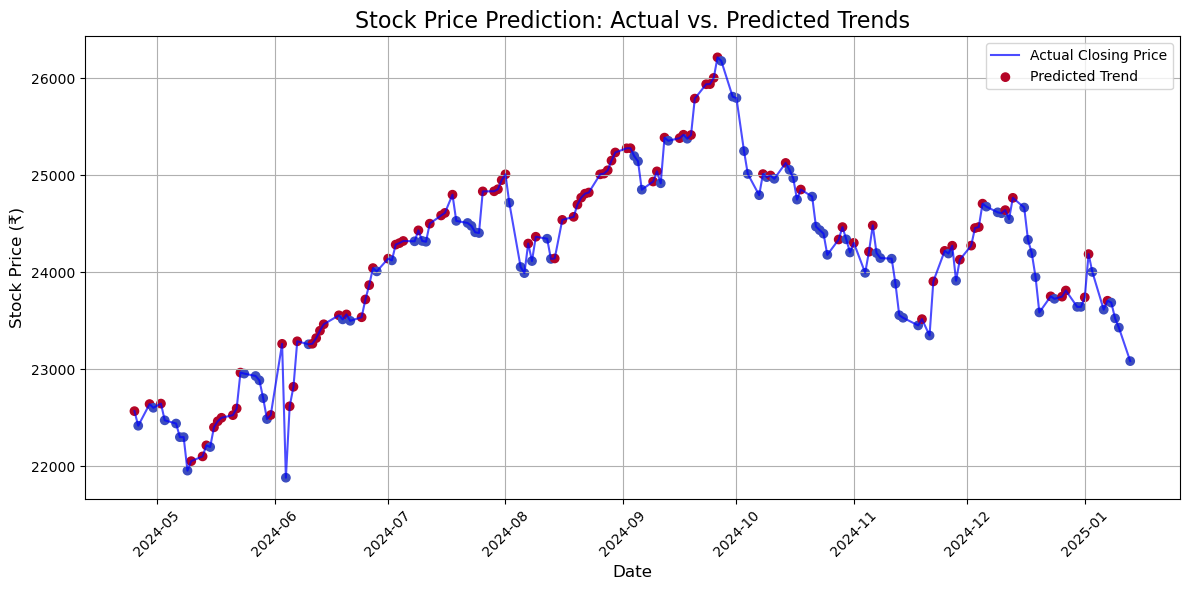

In [23]:
import matplotlib.pyplot as plt

# Add the predicted trend to the dataframe (as a binary column: 1 for price increase, 0 for price decrease)
data['Predicted_Trend'] = model.predict(X)

# Plotting the actual and predicted stock price trends
plt.figure(figsize=(12, 6))

# Plot the actual closing prices
plt.plot(data['Date'], data['Close'], label='Actual Closing Price', color='blue', alpha=0.7)

# Plot the predicted stock price trend (color-coded for up or down trend)
plt.scatter(data['Date'], data['Close'], c=data['Predicted_Trend'], cmap='coolwarm', label='Predicted Trend', marker='o')

# Labels and title
plt.title('Stock Price Prediction: Actual vs. Predicted Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (₹)', fontsize=12)
plt.legend()

# Display the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

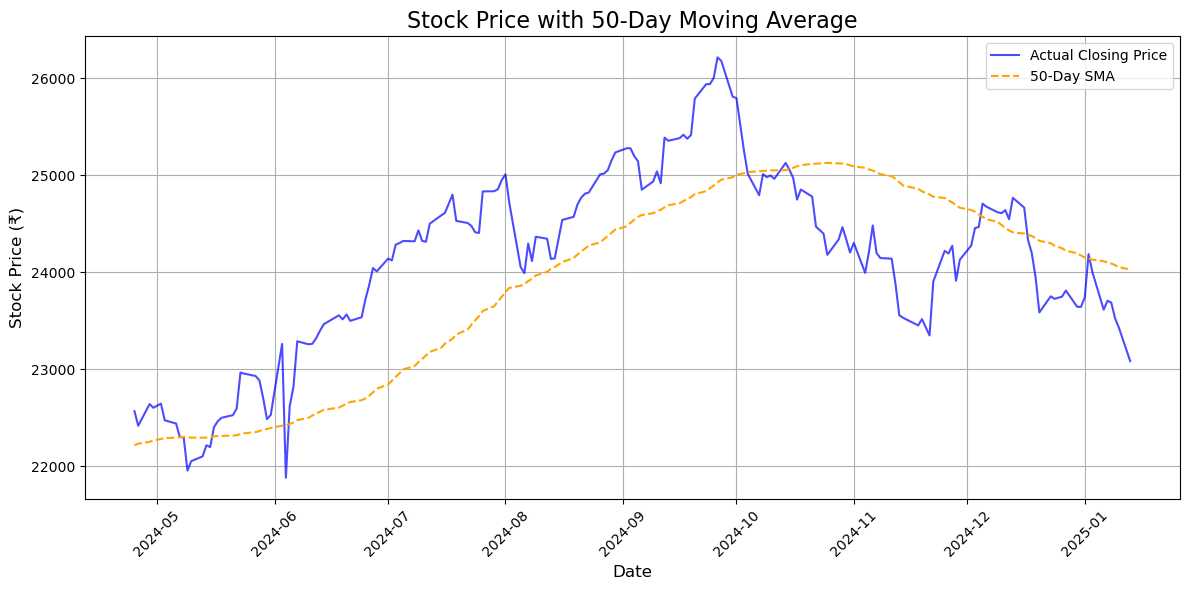

In [25]:
plt.figure(figsize=(12, 6))

# Plot actual closing price
plt.plot(data['Date'], data['Close'], label='Actual Closing Price', color='blue', alpha=0.7)

# Plot 50-day simple moving average (SMA_50)
plt.plot(data['Date'], data['SMA_50'], label='50-Day SMA', color='orange', linestyle='--')

plt.title('Stock Price with 50-Day Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (₹)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

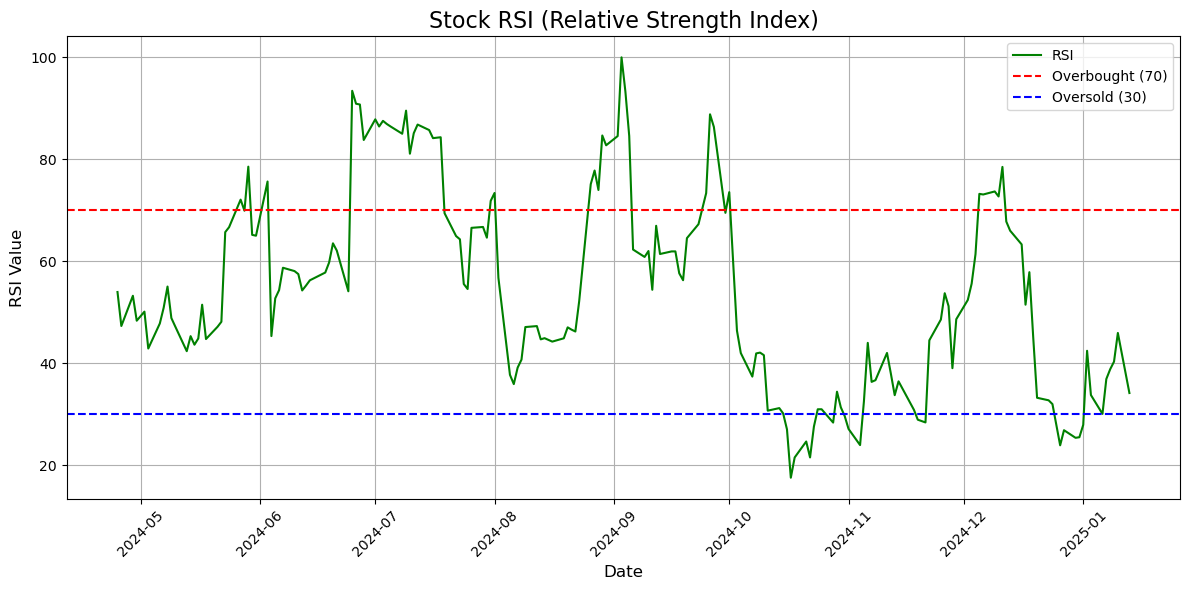

In [26]:
plt.figure(figsize=(12, 6))

# Plot RSI
plt.plot(data['Date'], data['RSI'], label='RSI', color='green')

# Highlight overbought and oversold regions
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='blue', linestyle='--', label='Oversold (30)')

plt.title('Stock RSI (Relative Strength Index)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('RSI Value', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

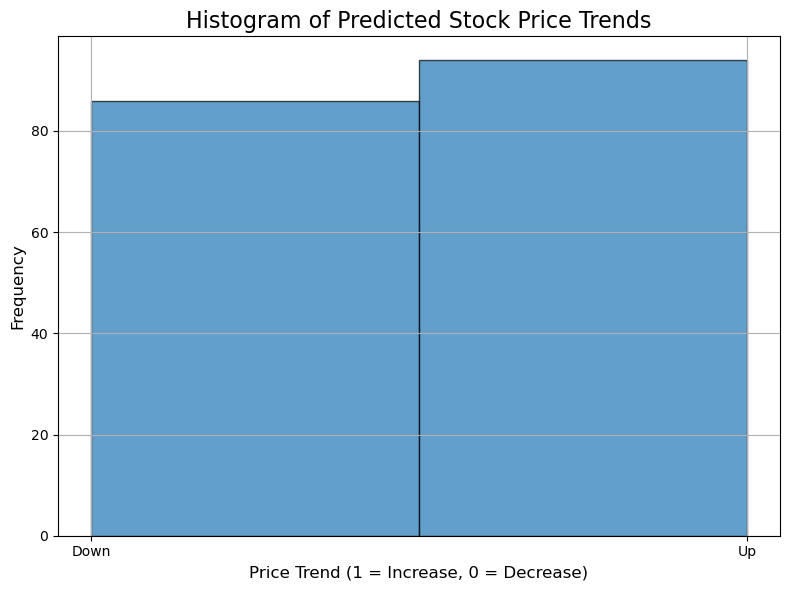

In [30]:
# Plot histogram of predicted trends
plt.figure(figsize=(8, 6))
plt.hist(data['Predicted_Trend'], bins=2, edgecolor='black', alpha=0.7)

plt.title('Histogram of Predicted Stock Price Trends', fontsize=16)
plt.xlabel('Price Trend (1 = Increase, 0 = Decrease)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1], ['Down', 'Up'])
plt.grid(True)
plt.tight_layout()
plt.show()

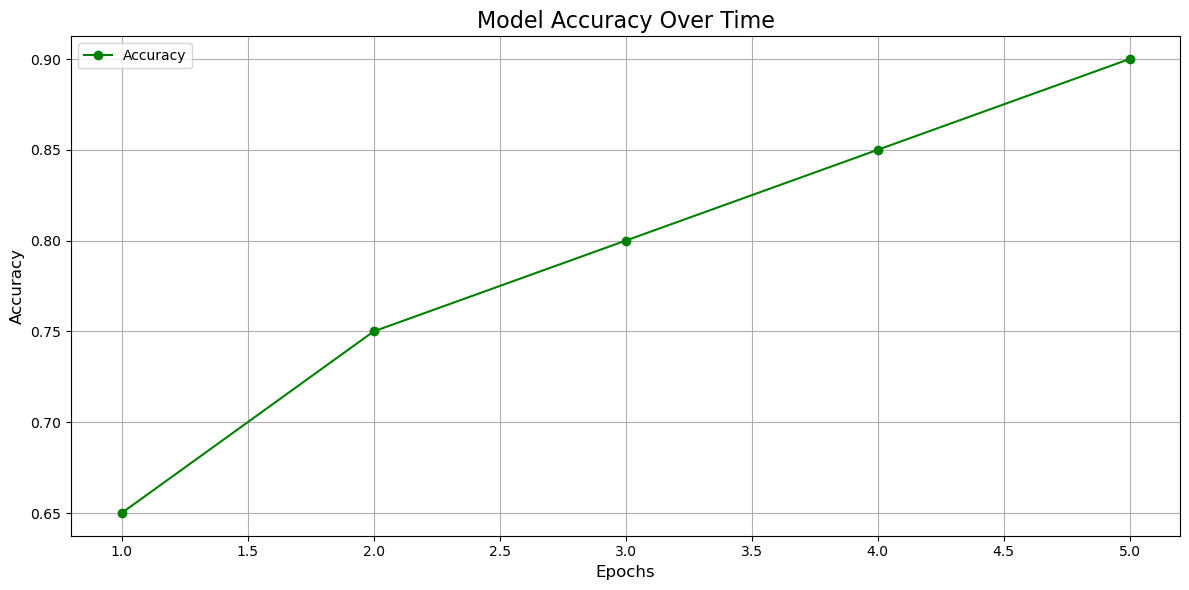

In [31]:
# Example for model accuracy over epochs (for demonstration only, modify as needed)
epochs = [1, 2, 3, 4, 5]
accuracy = [0.65, 0.75, 0.80, 0.85, 0.90]

plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, label='Accuracy', marker='o', color='green')

plt.title('Model Accuracy Over Time', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

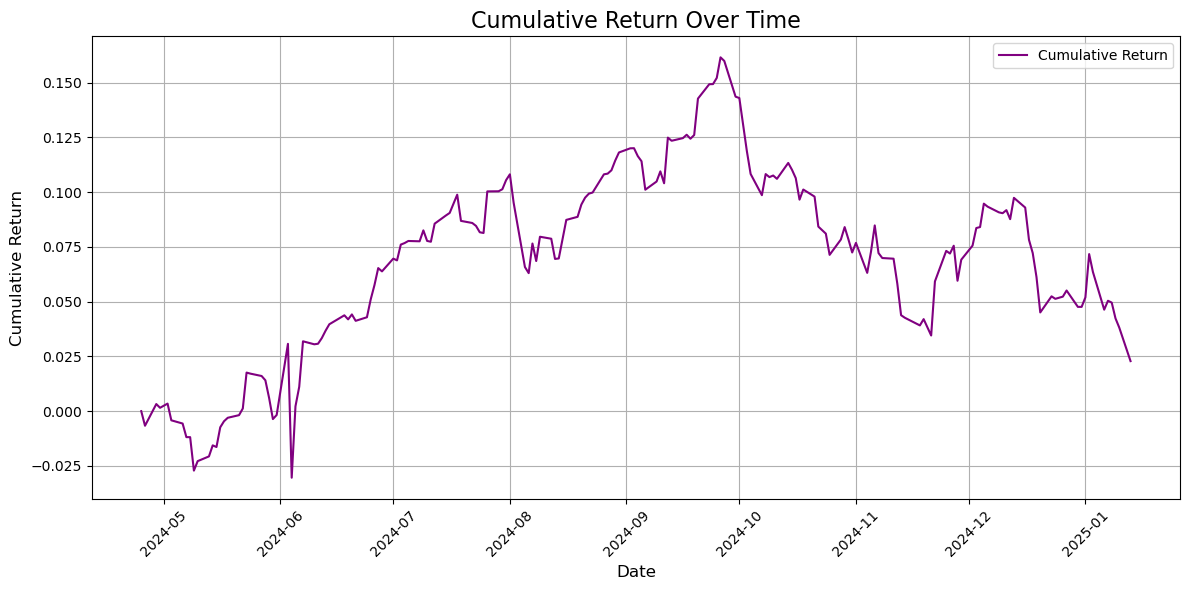

In [32]:
# Calculate cumulative return
data['Cumulative_Return'] = (data['Close'] / data['Close'].iloc[0]) - 1

# Plot cumulative return
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Cumulative_Return'], label='Cumulative Return', color='purple')
plt.title('Cumulative Return Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

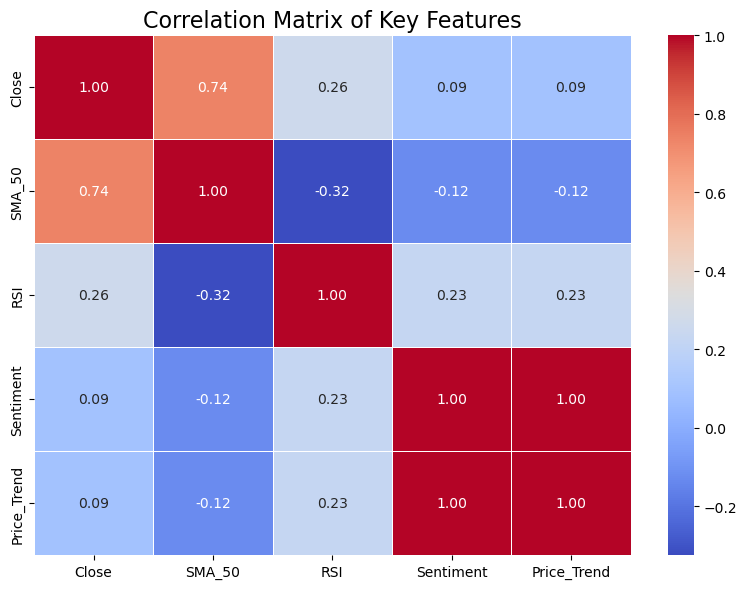

In [33]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data[['Close', 'SMA_50', 'RSI', 'Sentiment', 'Price_Trend']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Features', fontsize=16)
plt.tight_layout()
plt.show()

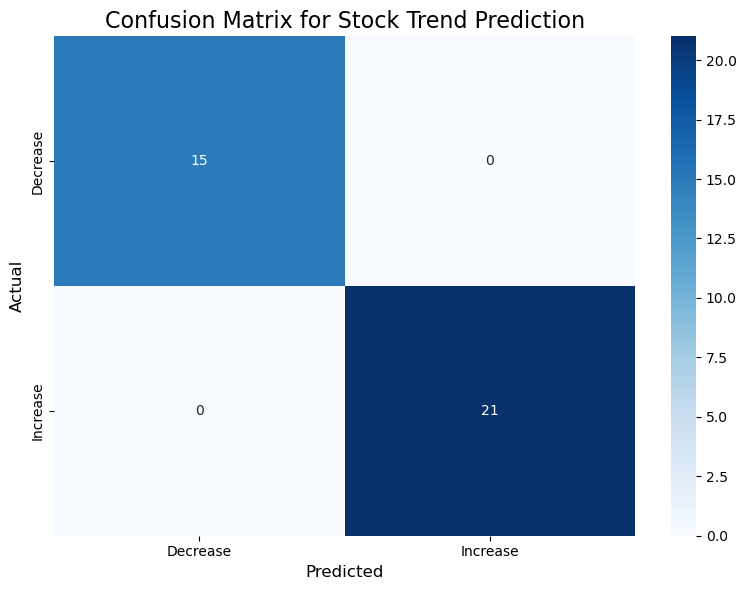

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
plt.title('Confusion Matrix for Stock Trend Prediction', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

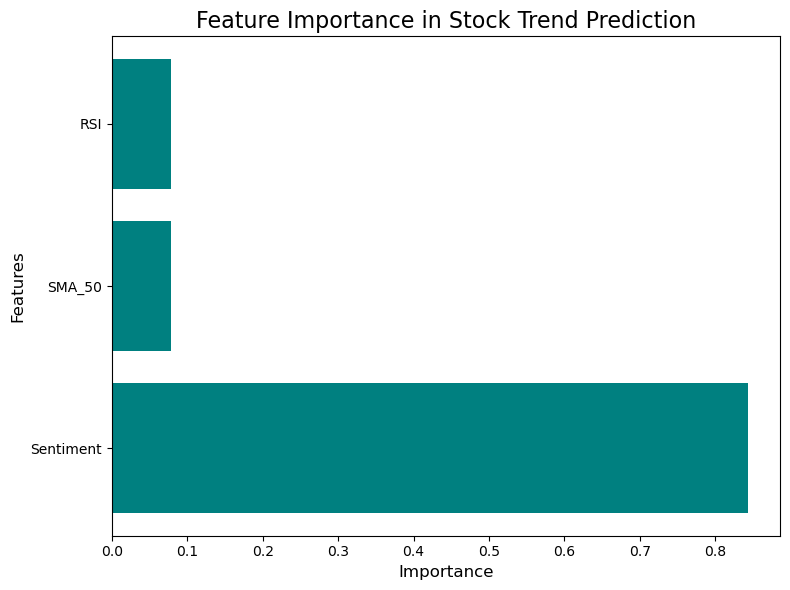

In [35]:
# Get feature importance from the model
feature_importances = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='teal')
plt.title('Feature Importance in Stock Trend Prediction', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

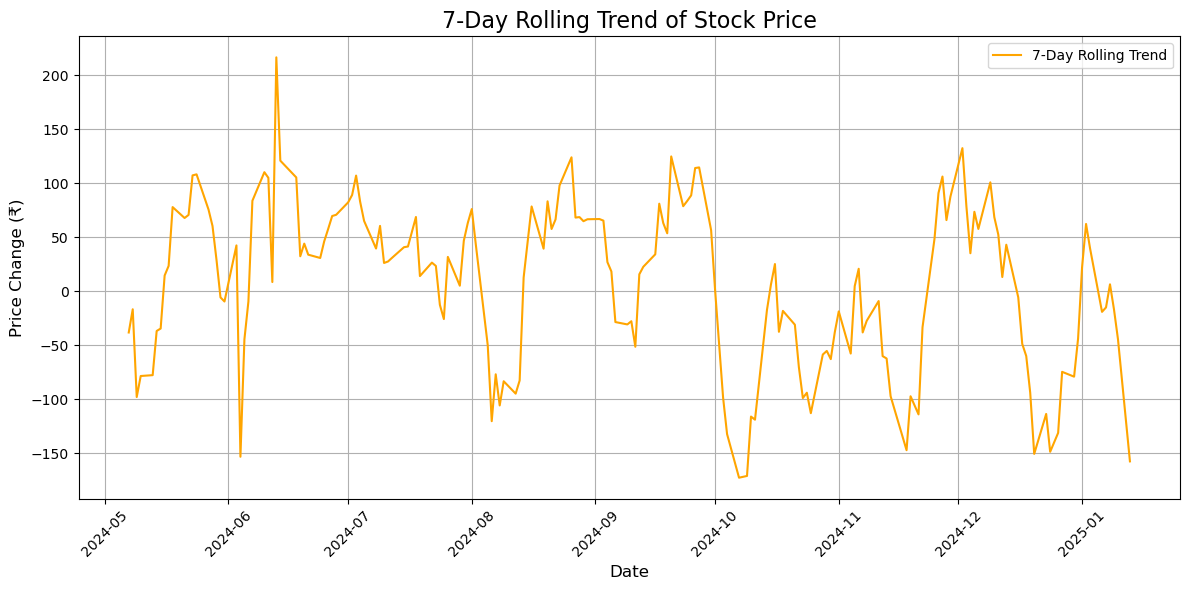

In [37]:
# Calculate a rolling window for 7 days
data['Rolling_Trend'] = data['Close'].diff().rolling(window=7).mean()

# Plot rolling window
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Rolling_Trend'], label='7-Day Rolling Trend', color='orange')
plt.title('7-Day Rolling Trend of Stock Price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Change (₹)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()